# Red Wine quality prediction

### Description

The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

### Attribute Information

### Load the libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import r2_score

### Load the Dataset

In [2]:
df_wine=pd.read_csv("C:/Users/HP/anaconda3/DataScience/DataTrainedProjects/wine_quality.csv")

In [3]:
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
# we will verify the null values present in the dataset
df_wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
df_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### Key Insights

- total sulfur dioxide & free sulphur dioxide has high maximum values compare to other features
- mean is closer to median in some cases and in some cases it varies slightly
- dataset wont contain null values
- there is some degree of skewness in some features
- all the features are of type float but only target value is of type int

In [6]:
# we will find the shape of the dataset
df_wine.shape

(1599, 12)

In [7]:
# we will find the datatypes of the individual features
df_wine.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [8]:
# we will find skewness of the dataset
df_wine.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

### Visualization of the dataset

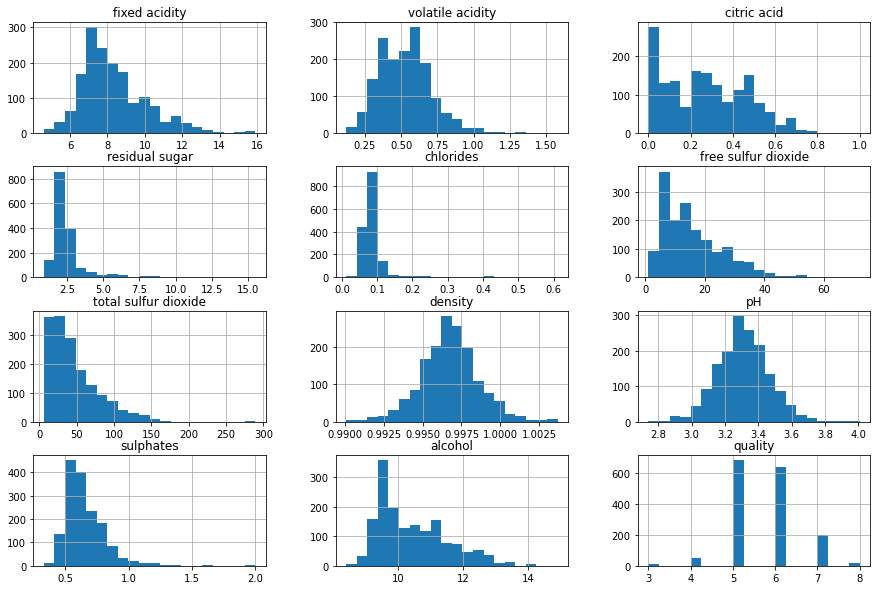

In [9]:
df_wine.hist(bins=20,figsize=(15,10))
plt.show()

### Remove skewness of the dataset

In [11]:

from sklearn.preprocessing import power_transform
cols=df_wine.columns

x=power_transform(df_wine[cols],method='yeo-johnson')


### Plot after removing skewness

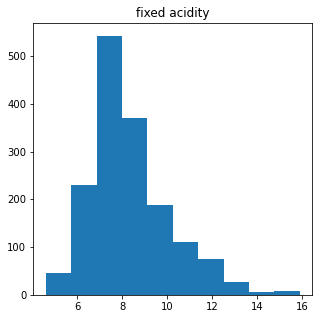

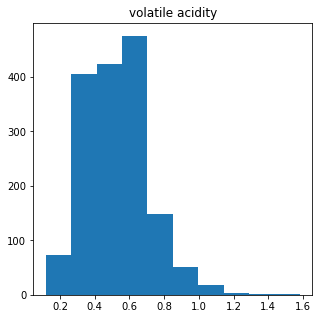

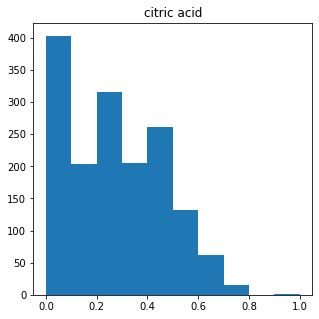

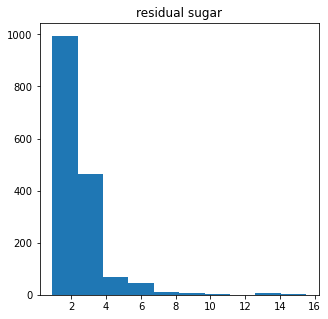

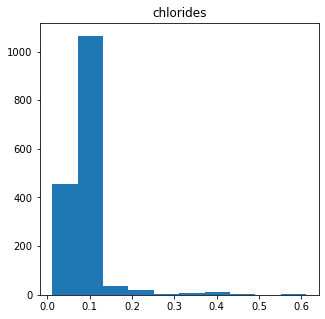

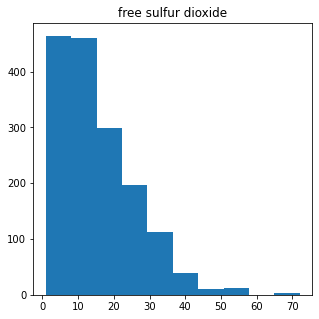

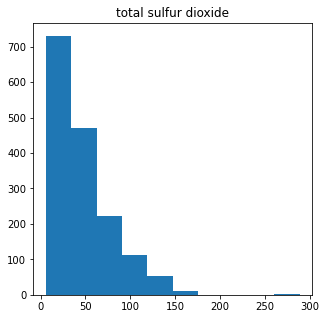

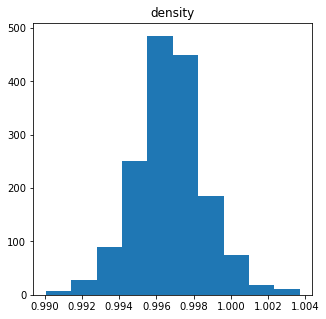

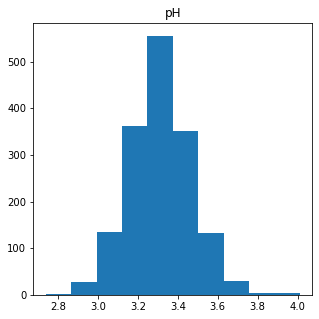

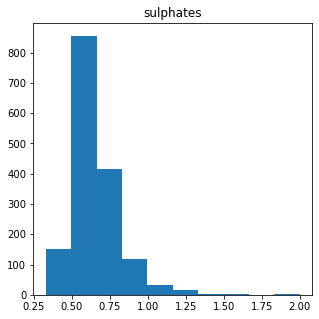

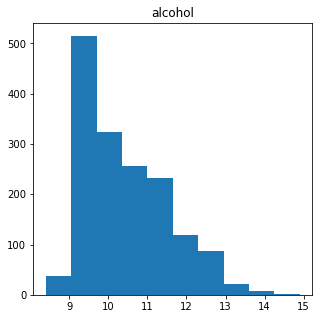

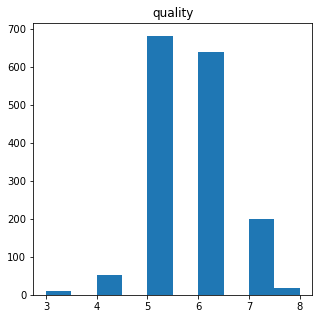

In [14]:
for i,col in enumerate(cols):
    plt.figure(i,figsize=(5,5))
    plt.hist(df_wine[col])
    plt.title(col)

##### Here we have removed the skewness of the above mentioned columns

### plotting Outliers

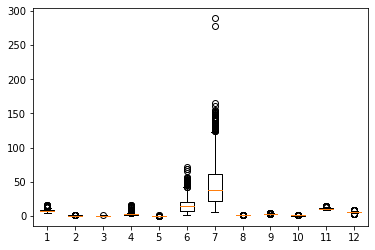

In [15]:
plt.boxplot(df_wine)
plt.show()

we have outliers in the columns fixed acidity,volatile acidity,residual sugar,chlorides,PH,Sulphates so we will use zscore to remove the outliers above the set threshold value

In [16]:
from scipy.stats import zscore
z=np.abs(zscore(df_wine))
z

array([[0.52835961, 0.96187667, 1.39147228, ..., 0.57920652, 0.96024611,
        0.78782264],
       [0.29854743, 1.96744245, 1.39147228, ..., 0.1289504 , 0.58477711,
        0.78782264],
       [0.29854743, 1.29706527, 1.18607043, ..., 0.04808883, 0.58477711,
        0.78782264],
       ...,
       [1.1603431 , 0.09955388, 0.72391627, ..., 0.54204194, 0.54162988,
        0.45084835],
       [1.39015528, 0.65462046, 0.77526673, ..., 0.30598963, 0.20930812,
        0.78782264],
       [1.33270223, 1.21684919, 1.02199944, ..., 0.01092425, 0.54162988,
        0.45084835]])

In [17]:
threshold=3
print(np.where(z>3))

(array([  13,   14,   15,   15,   17,   17,   19,   33,   38,   42,   43,
         45,   57,   81,   81,   83,   86,   88,   91,   92,   95,  106,
        106,  109,  120,  126,  127,  142,  144,  147,  151,  151,  151,
        151,  163,  164,  169,  169,  181,  199,  226,  226,  240,  243,
        244,  258,  258,  274,  281,  291,  324,  325,  339,  340,  347,
        354,  374,  381,  391,  396,  396,  400,  400,  442,  442,  451,
        459,  467,  480,  480,  494,  515,  517,  544,  554,  554,  555,
        555,  557,  557,  568,  584,  588,  591,  595,  608,  614,  636,
        639,  649,  649,  651,  652,  652,  652,  672,  672,  684,  690,
        690,  692,  692,  695,  723,  724,  730,  754,  776,  777,  795,
        821,  832,  836,  837,  889,  899,  911,  917,  923,  925,  926,
        982, 1017, 1018, 1043, 1051, 1051, 1071, 1074, 1079, 1079, 1081,
       1081, 1111, 1114, 1131, 1154, 1165, 1175, 1186, 1231, 1235, 1244,
       1244, 1244, 1260, 1269, 1269, 1270, 1270, 1

In [18]:
z[1589][2]

0.36446303582288697

In [19]:
df_wine_new=df_wine[(z<3).all(axis=1)]

### MultiVariate Analysis

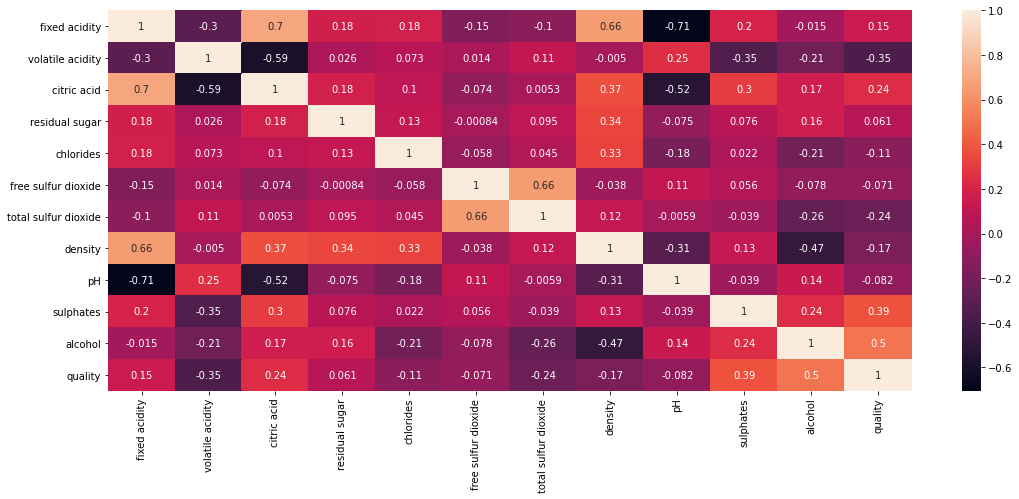

In [20]:
# correlation by visualization
plt.figure(figsize=[18,7])
# plot correlation
sns.heatmap(df_wine_new.corr(),annot=True)
plt.show()

 we have citric acid which is negetively corelated to the volatile acidity,PH we will drop that column but its not impacting the target variable. so we wont drop any columns here.

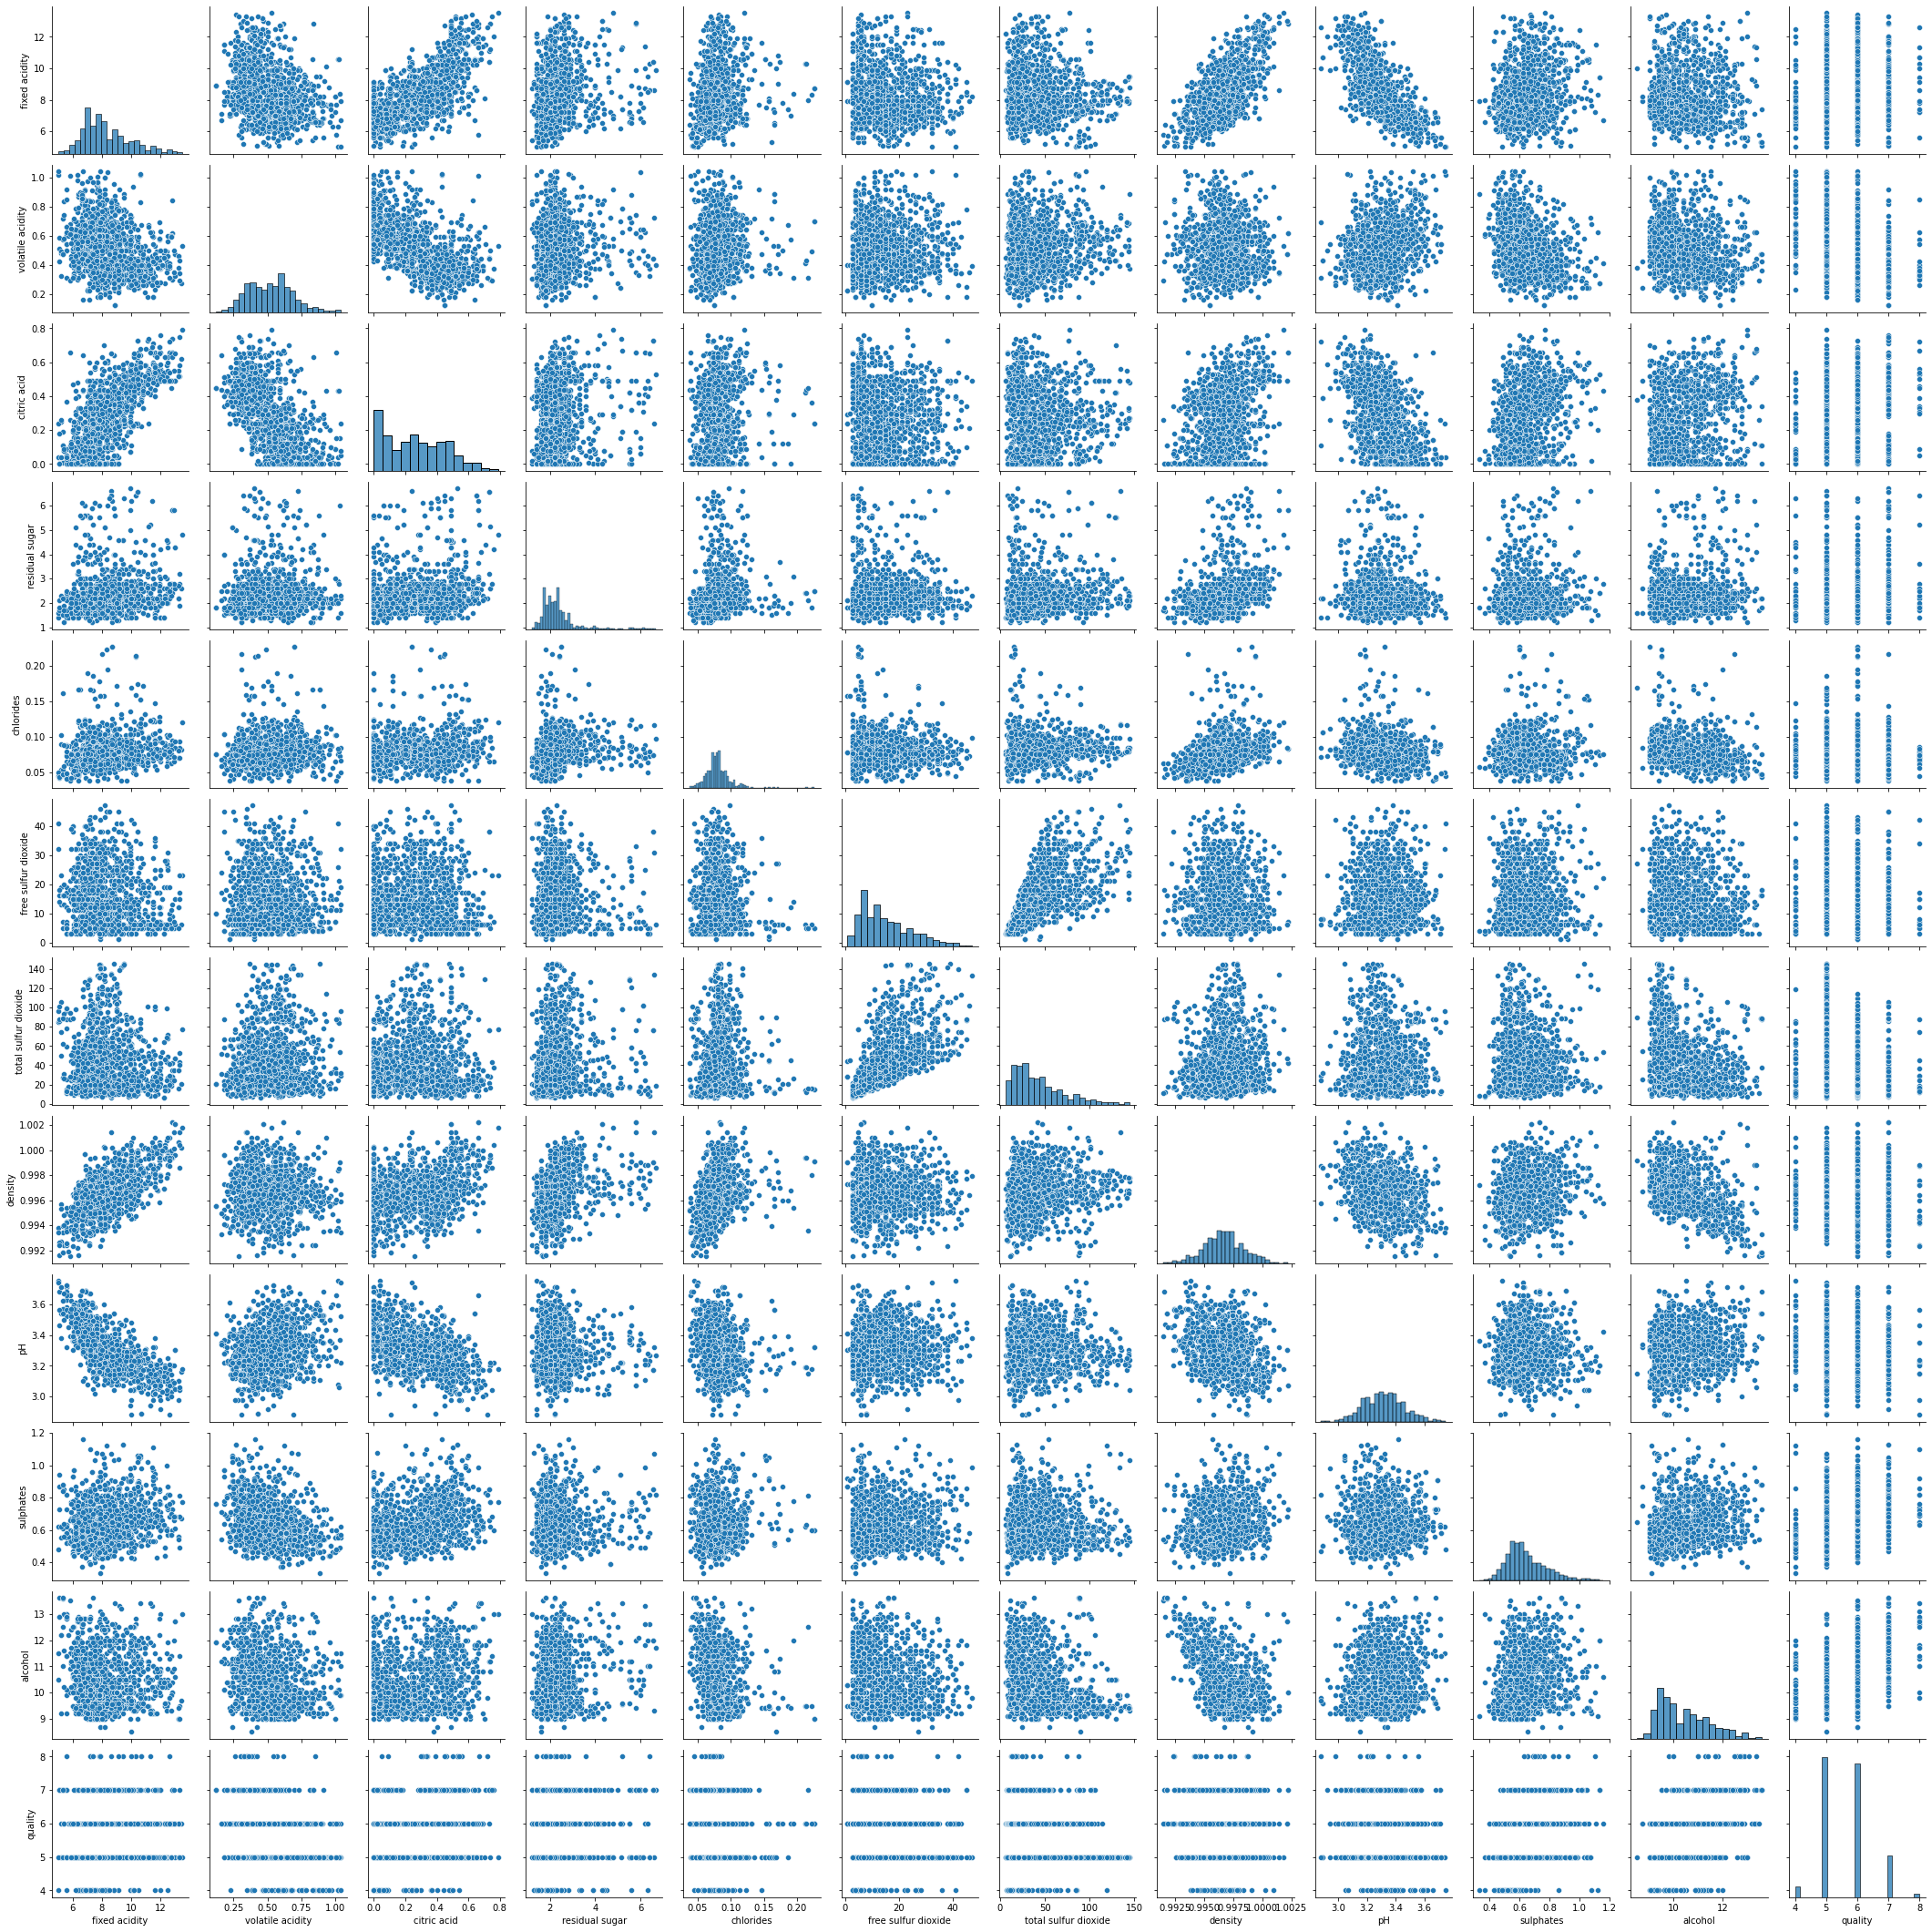

In [21]:
sns.pairplot(df_wine_new)

From the above pairplot we know that most of all the datapoints are scattered normally. 
But some show linearity like PH decreases as fixed acidity increases,free sulphur dioxide increases as total sulfur dioxide 
increases.

wine is of best quality as density is high & wine is of low quality as PH increases

## Data Modeling

In [22]:
# categorizing the wine quality
df_wine_new['best_quality'] = [ 1 if x>=7 else 0 for x in df_wine_new.quality] 
df_wine_new.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,best_quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [23]:
df_wine_new.drop('quality',axis=1,inplace=True)
df_wine_new.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,best_quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [24]:
x=df_wine_new.drop('best_quality',axis=1)

In [25]:
y=df_wine_new['best_quality']

### Splitting in to Train & Test set

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,mean_squared_error,mean_absolute_error,roc_auc_score,roc_curve
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

### Scaling & Standardizing the dataset

In [27]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
n=MinMaxScaler()
n=n.fit(x_train)
new_x_train=n.transform(x_train)
new_x_test=n.transform(x_test)
scaler = StandardScaler()
new_x_train=scaler.fit_transform(new_x_train)
new_x_test=scaler.fit_transform(new_x_test)

###### Applying Logistic Regression

In [28]:
lm=LogisticRegression()
lm=lm.fit(new_x_train,y_train)
pred_lm=lm.predict(new_x_test)
lm.score(new_x_test,y_test)
print("Accuracy_score- ",accuracy_score(pred_lm,y_test))
print(confusion_matrix(pred_lm,y_test))
print(classification_report(pred_lm,y_test))

Accuracy_score-  0.865979381443299
[[238  30]
 [  9  14]]
              precision    recall  f1-score   support

           0       0.96      0.89      0.92       268
           1       0.32      0.61      0.42        23

    accuracy                           0.87       291
   macro avg       0.64      0.75      0.67       291
weighted avg       0.91      0.87      0.88       291



###### Applying Naive Bayes

In [29]:
nb= BernoulliNB()
nb=nb.fit(new_x_train,y_train)
pred_nb=nb.predict(new_x_test)
nb.score(new_x_test,y_test)
print("Accuracy Score of Naive Bayes classification is: ",accuracy_score(pred_nb,y_test))
print(confusion_matrix(pred_nb,y_test))
print(classification_report(pred_nb,y_test))

Accuracy Score of Naive Bayes classification is:  0.8316151202749141
[[218  20]
 [ 29  24]]
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       238
           1       0.55      0.45      0.49        53

    accuracy                           0.83       291
   macro avg       0.71      0.68      0.70       291
weighted avg       0.82      0.83      0.83       291



###### Applying Decision Tree Classifier

In [30]:
dt=DecisionTreeClassifier()
dt=dt.fit(new_x_train,y_train)
pred_dt=dt.predict(new_x_test)
dt.score(new_x_test,y_test)
print("Accuracy score of Decision trees is: ",accuracy_score(pred_dt,y_test))
print(confusion_matrix(pred_dt,y_test))
print(classification_report(pred_dt,y_test))

Accuracy score of Decision trees is:  0.872852233676976
[[226  16]
 [ 21  28]]
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       242
           1       0.64      0.57      0.60        49

    accuracy                           0.87       291
   macro avg       0.78      0.75      0.76       291
weighted avg       0.87      0.87      0.87       291



###### Applying Support vector classification

In [31]:
kernelList=['linear','poly','rbf']
for i in kernelList:
    sv=SVC(kernel=i)
    sv.fit(new_x_train,y_train)
    sv.score(new_x_train,y_train)
    pred_sv=sv.predict(new_x_test)
    print("Metrics for ",i)
    print("Accuracy score of SVM model is :",accuracy_score(pred_sv,y_test))
    print(confusion_matrix(pred_sv,y_test))
    print(classification_report(pred_sv,y_test))
    print("----------------------------------------")

Metrics for  linear
Accuracy score of SVM model is : 0.872852233676976
[[243  33]
 [  4  11]]
              precision    recall  f1-score   support

           0       0.98      0.88      0.93       276
           1       0.25      0.73      0.37        15

    accuracy                           0.87       291
   macro avg       0.62      0.81      0.65       291
weighted avg       0.95      0.87      0.90       291

----------------------------------------
Metrics for  poly
Accuracy score of SVM model is : 0.8865979381443299
[[242  28]
 [  5  16]]
              precision    recall  f1-score   support

           0       0.98      0.90      0.94       270
           1       0.36      0.76      0.49        21

    accuracy                           0.89       291
   macro avg       0.67      0.83      0.71       291
weighted avg       0.94      0.89      0.90       291

----------------------------------------
Metrics for  rbf
Accuracy score of SVM model is : 0.8969072164948454
[[243  2

###### finding cross val score of best SVM model 

In [32]:
cross_val_score(SVC(kernel='rbf',C=30,gamma='auto'),new_x_test,y_test,cv=10)

array([0.9       , 0.86206897, 0.89655172, 0.86206897, 0.89655172,
       0.82758621, 0.82758621, 0.89655172, 0.86206897, 0.89655172])

At cv =1, the cross validation score is showing maximum value. so we will average the sv scores

###### Average score

In [33]:
kernels=['poly','rbf']
c=[1,10,20,30]
avg_scores={}
for kval in kernels:
    for cval in c:
        cv_scores=cross_val_score(SVC(kernel='rbf',C=30,gamma='auto'),new_x_test,y_test,cv=5)
        avg_scores[kval+'_'+str(cval)]=np.average(cv_scores)
avg_scores

{'poly_1': 0.8727644652250145,
 'poly_10': 0.8727644652250145,
 'poly_20': 0.8727644652250145,
 'poly_30': 0.8727644652250145,
 'rbf_1': 0.8727644652250145,
 'rbf_10': 0.8727644652250145,
 'rbf_20': 0.8727644652250145,
 'rbf_30': 0.8727644652250145}

###### Applying K-Nearest Neighbors classification

In [34]:
knn=KNeighborsClassifier(n_neighbors=2)
knn=knn.fit(new_x_train,y_train)
predict_knn=knn.predict(new_x_test)
knn.score(new_x_test,y_test)
print("Accuracy score of K-Neighbours is :",accuracy_score(predict_knn,y_test))
print(confusion_matrix(predict_knn,y_test))
print(classification_report(predict_knn,y_test))

Accuracy score of K-Neighbours is : 0.8969072164948454
[[244  27]
 [  3  17]]
              precision    recall  f1-score   support

           0       0.99      0.90      0.94       271
           1       0.39      0.85      0.53        20

    accuracy                           0.90       291
   macro avg       0.69      0.88      0.74       291
weighted avg       0.95      0.90      0.91       291



## Hyperparameter tuning

In [35]:
from sklearn.model_selection import GridSearchCV
rfc = RandomForestClassifier(n_jobs=-1,max_features= 'sqrt' ,n_estimators=50, oob_score = True) 

param_grid = { 
    'n_estimators': [200, 700],
    'max_features': ['auto', 'sqrt', 'log2'],
    'random_state':[0,30,42]    
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(new_x_test, y_test)
print(CV_rfc.best_params_)

{'max_features': 'auto', 'n_estimators': 200, 'random_state': 30}


###### Applying Random forest classifier

In [36]:
rnd=RandomForestClassifier(max_features='auto',n_estimators=200,oob_score=True,random_state=30)
rnd=rnd.fit(new_x_train,y_train)
predict_rnd=rnd.predict(new_x_test)
rnd.score(new_x_test,y_test)
print("Accuracy score of random forest classifier is: ",accuracy_score(predict_rnd,y_test))
print(confusion_matrix(predict_rnd,y_test))
print(classification_report(predict_rnd,y_test))

Accuracy score of random forest classifier is:  0.9037800687285223
[[243  24]
 [  4  20]]
              precision    recall  f1-score   support

           0       0.98      0.91      0.95       267
           1       0.45      0.83      0.59        24

    accuracy                           0.90       291
   macro avg       0.72      0.87      0.77       291
weighted avg       0.94      0.90      0.92       291



###### Finding errors

In [37]:
#calculating mean_absolute_error
rnd_MAE= mean_absolute_error(y_test,predict_rnd)
#claculating mean_squared_error
rnd_MSE = mean_squared_error(y_test,predict_rnd)
# calculating root mean squared error
rnd_RMSE = np.sqrt(rnd_MSE)
# display MSE
print('mean squared error is : ',rnd_MSE)
# display RMSE
print('root mean squared error is : ',rnd_RMSE)
# display MAE
print('mean absolute error is : ',rnd_MAE)

mean squared error is :  0.09621993127147767
root mean squared error is :  0.3101933772205294
mean absolute error is :  0.09621993127147767


###### prediction vs original values

In [38]:
prediction = list(rnd.predict(new_x_test))
predicted_df = {'predicted_values': prediction, 'original_values': y_test}
#creating new dataframe
pd.DataFrame(predicted_df).head(20)

,predicted_values,original_values
606,1,1
845,0,0
60,0,0
1595,0,0
171,0,0
693,0,0
1161,0,0
884,0,0
1115,0,0
1461,0,0


###### cross validation for Random forest classifier

In [39]:
# lets predict R2 Score and Cross validation score

rfs = r2_score(y_test,predict_rnd)
print('R2 Score:',rfs)

rfscore = cross_val_score(rnd,new_x_train,y_train,cv=5)
rfc = rfscore.mean()
print('Cross Val Score:',rfc*100)

R2 Score: 0.250276039749724
Cross Val Score: 89.91379310344827


In [40]:
# predict probabilities
pred_prob1 = lm.predict_proba(new_x_test)
pred_prob2 = knn.predict_proba(new_x_test)
pred_prob3 = rnd.predict_proba(new_x_test)
pred_prob4 = dt.predict_proba(new_x_test)

In [41]:
# finding fpr,tpr,threshold for different models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob3[:,1], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, pred_prob4[:,1], pos_label=1)
# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)


from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])
auc_score3 = roc_auc_score(y_test, pred_prob3[:,1])
auc_score4 = roc_auc_score(y_test, pred_prob4[:,1])
print(auc_score1, auc_score2, auc_score3, auc_score4)

0.8593117408906882 0.8581155686418844 0.9216507177033493 0.7756716967243282


### ROC_AUC Curve

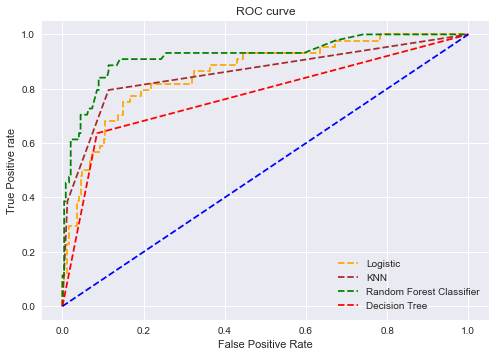

In [42]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic')
plt.plot(fpr2, tpr2, linestyle='--',color='brown', label='KNN')
plt.plot(fpr3, tpr3, linestyle='--',color='green', label='Random Forest Classifier')
plt.plot(fpr4, tpr4, linestyle='--',color='red', label='Decision Tree')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

Since the area under the ROC curve is more for Random Forest Classifier.we will consider Random forest to predict the output variable

In [43]:
import pickle
filename = 'red_wine.pkl'
pickle.dump(rnd, open(filename, 'wb'))

In [44]:
loaded_model = pickle.load(open('red_wine.pkl', 'rb'))
result = loaded_model.score(new_x_test, y_test)
print(result*100)

90.37800687285224


In [45]:
conclusion=pd.DataFrame([loaded_model.predict(new_x_test)[:],y_test[:]],index=["Predicted","Original"])

In [46]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,281,282,283,284,285,286,287,288,289,290
Predicted,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Original,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
